# Student Name: Sanjivani Keshav Dawang
# Project Title: House Price Prediction

## Project Overview
The goal of this project is to predict house prices (`SalePrice`) based on features such as property size, quality, year built, and neighborhood.  

### Why This Project?
- Helps buyers and sellers estimate fair house prices.
- Assists real estate agents and mortgage lenders.
- Provides hands-on experience with regression modeling.

### Steps in this Project:
1. Business Understanding  
2. Data Understanding  
3. Data Preparation  
4. Data Preprocessing  
5. Exploratory Data Analysis (EDA)  
6. Model Selection and Training  
7. Predictions and Evaluation  
8. Feature Importance Analysis


## 1. Import Libraries

We import libraries for:

- **Data manipulation**: pandas, numpy  
- **Visualization**: matplotlib, seaborn  
- **Machine learning**: sklearn (Linear Regression, Random Forest, preprocessing, metrics)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


import warnings
warnings.filterwarnings('ignore')

## 2. Load Dataset

We load the dataset into Python and inspect the first few rows to understand the structure:

- Columns and types  
- Sample data values  
- Initial observations about missing data


In [3]:
# Load the dataset
data = pd.read_csv('/kaggle/input/datasets/shashanknecrothapa/ames-housing-dataset/AmesHousing.csv')  # path

# Display first 5 rows
data.head()


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## 3. Data Overview

Check dataset shape, data types, and summary statistics to understand:

- Number of rows and columns  
- Numeric vs categorical columns  
- Min, max, mean, median, and standard deviation


In [4]:
# Dataset shape
print("Dataset shape:", data.shape)

Dataset shape: (2930, 82)


In [5]:
# Data types
print("\nData types:\n", data.dtypes)


Data types:
 Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 82, dtype: object


In [6]:
# Summary statistics
data.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


## 4. Correlation Analysis

We examine correlations between numeric features and `SalePrice` to identify important predictors.

- Features with high positive correlation likely increase SalePrice  
- Features with negative correlation may decrease SalePrice


Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647877
Garage Area       0.640401
Total Bsmt SF     0.632280
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Garage Yr Blt     0.526965
Mas Vnr Area      0.508285
TotRms AbvGrd     0.495474
Fireplaces        0.474558
BsmtFin SF 1      0.432914
Lot Frontage      0.357318
Wood Deck SF      0.327143
Open Porch SF     0.312951
Half Bath         0.285056
Bsmt Full Bath    0.276050
2nd Flr SF        0.269373
Name: SalePrice, dtype: float64


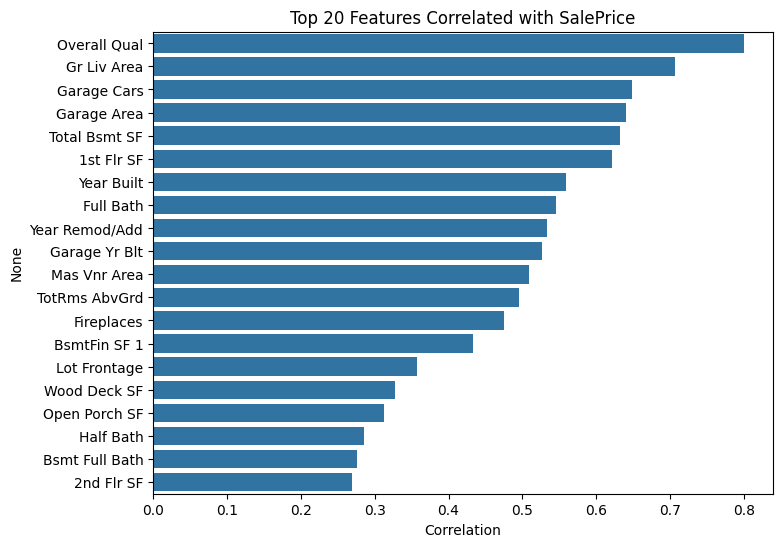

In [7]:
# Select numeric columns
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Correlation with SalePrice
corr_target = numeric_data.corr()['SalePrice'].sort_values(ascending=False)

# Display top 20 correlated features
top_corr = corr_target[1:21]  # skip SalePrice itself
print(top_corr)

# Plot top 20 correlations
plt.figure(figsize=(8,6))
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title("Top 20 Features Correlated with SalePrice")
plt.xlabel("Correlation")
plt.show()


## 5. Missing Value Analysis

We check which columns have missing values:

- Numeric columns: can fill with median  
- Categorical columns: can fill with mode


In [8]:
missing_values = data.isnull().sum()
missing_values[missing_values > 0]


Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64

## 6. Handle Missing Values

- Fill numeric missing values with **median**  
- Fill categorical missing values with **mode**  

This ensures no NaNs remain, which is necessary for machine learning models.


In [9]:
# Fill numeric missing values
for col in data.select_dtypes(include=np.number).columns:
    data[col].fillna(data[col].median(), inplace=True)

# Fill categorical missing values
for col in data.select_dtypes(include='object').columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Verify no missing values remain
data.isnull().sum().sum()


np.int64(0)

## 7. Feature and Target Selection

- **Target variable**: `SalePrice`  
- **Features**: All other columns (after encoding categorical variables)  

We use **one-hot encoding** to convert categorical columns into numeric form.


In [10]:
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# One-hot encoding for categorical columns
X = pd.get_dummies(X, drop_first=True)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 8. Feature Scaling

We scale numeric features using StandardScaler:

- Ensures all features have similar scale  
- Improves model performance and convergence


In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 9. Exploratory Data Analysis (EDA)

Visualizations help understand:

- Distribution of SalePrice  
- Relationship between living area and SalePrice  
- Detect outliers


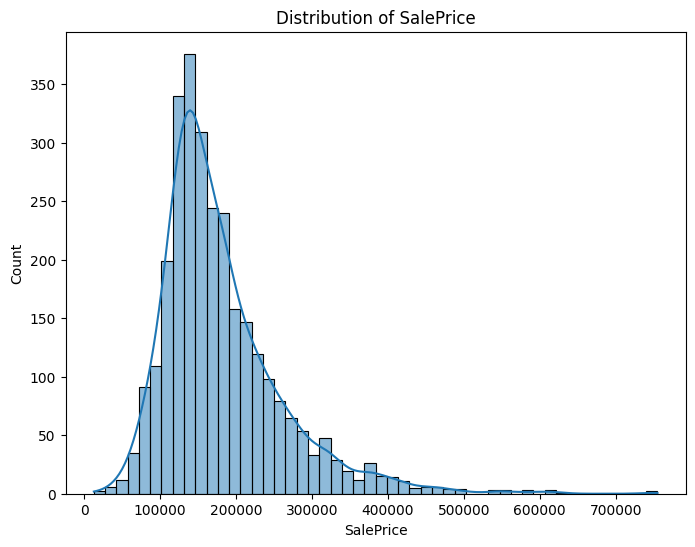

In [12]:
# Histogram of SalePrice
plt.figure(figsize=(8, 6))
sns.histplot(y, bins=50, kde=True)
plt.title("Distribution of SalePrice")
plt.show()

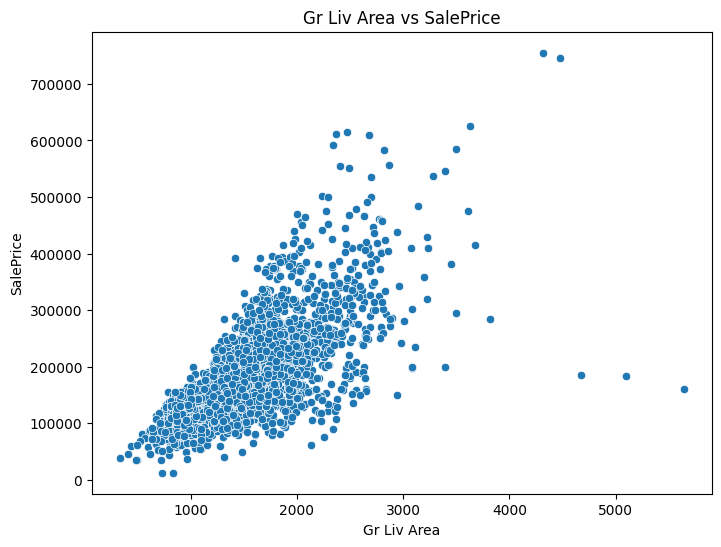

In [13]:
# Scatter plot: Gr Liv Area vs SalePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Gr Liv Area'], y=data['SalePrice'])
plt.title("Gr Liv Area vs SalePrice")
plt.show()

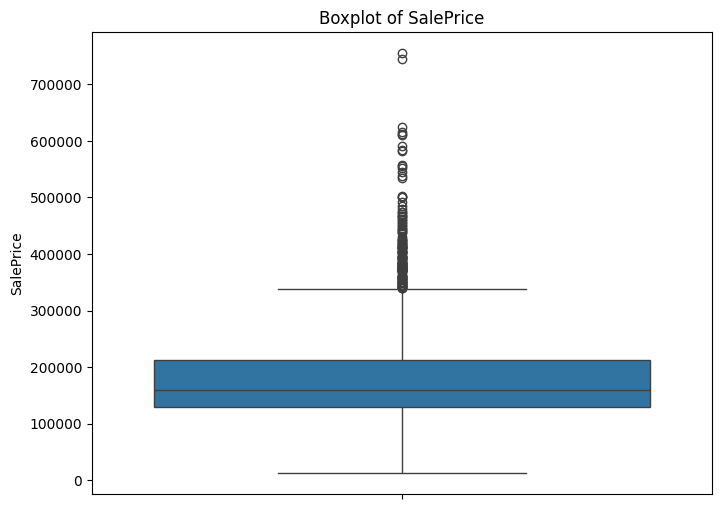

In [14]:
# Boxplot for SalePrice
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['SalePrice'])
plt.title("Boxplot of SalePrice")
plt.show()

## 10. Model 1: Linear Regression

We start with Linear Regression as a baseline model:

- Easy to interpret  
- Provides benchmark performance  
- Evaluated using RMSE and R²

In [15]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression RMSE: {rmse_lr:.2f}")
print(f"Linear Regression R^2 Score: {r2_lr:.2f}")


Linear Regression RMSE: 36146.38
Linear Regression R^2 Score: 0.84


In [17]:
prediction = lr_model.predict(X_test_scaled)
print(f"Predicted value: {prediction[0]:.2f}")


Predicted value: 155869.54


## 11. Model 2: Random Forest Regressor

Random Forest is an ensemble model:

- Combines multiple decision trees  
- Reduces overfitting  
- Provides feature importance scores


In [18]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R^2 Score: {r2_rf:.2f}")


Random Forest RMSE: 26502.37
Random Forest R^2 Score: 0.91


## 12. Prediction Example

Predict SalePrice for first test samples to see model performance.


In [19]:
predictions = rf_model.predict(X_test_scaled[0:1])
print(f"Price is Rs {predictions}")


Price is Rs [189198.14]


## 13. Feature Importance

Random Forest allows us to identify the most influential features in predicting SalePrice:

- Helps understand which house attributes most affect price  
- Useful for business insights and feature selection


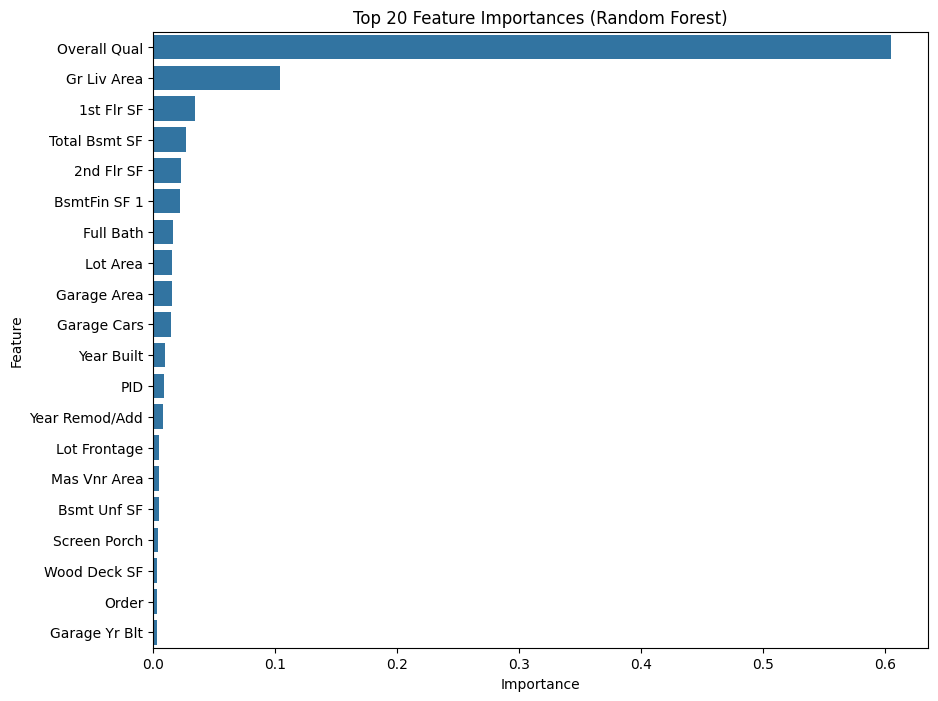

In [20]:
# Feature importance
importances = rf_model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(20)

# Plot top 20 features
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Top 20 Feature Importances (Random Forest)")
plt.show()
